In [83]:
import numpy as np
import keras
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import random
from random import randint

In [84]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def plot_multi_graph(xAxis,yAxes,title='',xAxisLabel='number',yAxisLabel='Y'):
    linestyles = ['-', '--', '-.', ':']
    plt.figure()
    plt.title(title)
    plt.xlabel(xAxisLabel)
    plt.ylabel(yAxisLabel)
    for key, value in yAxes.items():
        plt.plot(xAxis, np.array(value), label=key, linestyle=linestyles[randint(0,3)])
    plt.legend()

In [85]:
# define input sequence
raw_seq = [i for i in range(100)]

random.seed('sam') # set the seed
raw_seq = random.sample(raw_seq, 100)

# choose a number of time steps for sliding window from data start to target start
sliding_window = 20
# split into samples
X, y = split_sequence(raw_seq, sliding_window)

print(X)
print(y)

[[78 64 16 ... 85 73 34]
 [64 16 68 ... 73 34 40]
 [16 68  3 ... 34 40 50]
 ...
 [53 56 61 ... 45 44  1]
 [56 61 92 ... 44  1 43]
 [61 92 49 ...  1 43 98]]
[40 50 76 39 90 89 13 30 21 84  2 18 52 10 74  8 47 20 70  7 59 23 80 93
 17 79 26 88 96  4 35 65 58 36 91  9 31 12 11 25 19 14 46 75 29 55 57 87
  5 83 22 15 28 71 62 38 94 53 56 61 92 49 81 37 33 41 69 97 99 24  0 51
 86  6 45 44  1 43 98 42]


In [86]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 20
n_steps = 1
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [87]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [96]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# fit model
history = model.fit(X, y, epochs=100, verbose=0,
                    validation_data=(X,y),
                    callbacks=[TQDMNotebookCallback(
                    #    leave_inner=True
                    )
                             #  ,early_stop
                              ]
                   )

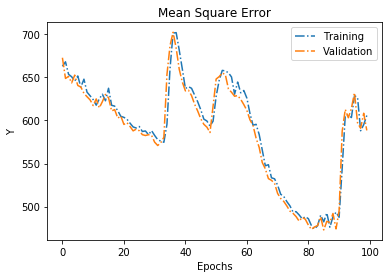

In [97]:
#Plot Error

# Mean Square Error

yAxes = {}
yAxes["Training"]=history.history['mean_squared_error']
yAxes["Validation"]=history.history['val_mean_squared_error']
plot_multi_graph(history.epoch,yAxes, title='Mean Square Error',xAxisLabel='Epochs')

In [98]:
# demonstrate prediction
x_input = array([i for i in range(100,120)])
print(x_input)
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
[[91.06552]]


In [99]:
# demonstrate prediction in data
yhat = model.predict(X, verbose=0)
print(yhat)

[[44.44245 ]
 [55.593536]
 [34.18795 ]
 [49.316406]
 [77.37667 ]
 [92.14894 ]
 [32.88875 ]
 [45.24442 ]
 [53.226524]
 [45.076912]
 [51.196365]
 [36.10516 ]
 [45.171623]
 [44.233356]
 [51.04828 ]
 [50.077377]
 [50.57363 ]
 [48.322327]
 [55.939674]
 [52.09527 ]
 [43.701496]
 [43.452168]
 [65.56243 ]
 [56.4361  ]
 [20.901958]
 [71.36655 ]
 [46.29732 ]
 [86.99962 ]
 [89.56538 ]
 [14.59629 ]
 [40.41057 ]
 [33.81991 ]
 [55.538563]
 [63.625736]
 [75.59745 ]
 [37.290424]
 [39.311775]
 [38.02833 ]
 [39.915882]
 [31.34694 ]
 [37.534286]
 [38.171944]
 [50.211754]
 [67.21801 ]
 [52.83474 ]
 [42.518456]
 [35.1315  ]
 [57.347336]
 [14.842256]
 [37.13909 ]
 [28.48974 ]
 [33.4993  ]
 [46.77608 ]
 [47.22924 ]
 [53.894653]
 [39.172462]
 [53.1559  ]
 [33.901726]
 [49.77066 ]
 [62.75428 ]
 [70.17219 ]
 [61.451   ]
 [70.645386]
 [48.2623  ]
 [32.519764]
 [40.41966 ]
 [40.316166]
 [47.54779 ]
 [62.5297  ]
 [31.963535]
 [29.583345]
 [35.737347]
 [43.49123 ]
 [51.260323]
 [73.220795]
 [41.40855 ]
 [42.53614 ]

In [100]:
print(y)

[40 50 76 39 90 89 13 30 21 84  2 18 52 10 74  8 47 20 70  7 59 23 80 93
 17 79 26 88 96  4 35 65 58 36 91  9 31 12 11 25 19 14 46 75 29 55 57 87
  5 83 22 15 28 71 62 38 94 53 56 61 92 49 81 37 33 41 69 97 99 24  0 51
 86  6 45 44  1 43 98 42]


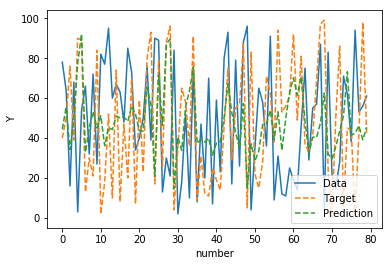

In [101]:
xAxis = [i for i in range(len(y))]
yAxes = {}
yAxes["Data"]=raw_seq[0:len(raw_seq)-sliding_window]
yAxes["Target"]=y
yAxes["Prediction"]=yhat
plot_multi_graph(xAxis,yAxes,title='')